In [92]:
import matplotlib
import pandas as pd
import numpy as np
import math
import re
import scipy
#import pymysql as db
import os
import sklearn
import datetime
import scipy.io as sio
from matplotlib import pyplot as plt
#from sshtunnel import SSHTunnelForwarder
from sklearn import model_selection, svm
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.metrics import classification_report, average_precision_score, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.pipeline import Pipeline

#BCI MNE Imports
import mne
from mne import Epochs, pick_types, find_events
from mne.channels import read_layout
from mne.io import concatenate_raws, read_raw_edf
from mne.datasets import eegbci
from mne.decoding import CSP

#Data Ingestion
raw=sio.loadmat('C:\\648 wala\\VIVEK SHARMA\\EDUCATIONAL\\Brain Computer Interface\\DataSets\\NUST Pakistan\\Subject1_1D.mat')

#Determining the Left and Right Motor Stimulus From Appropriate Channels
left=raw['left']
right=raw['right']

time=[i for i in range(64300)] #Time For the Complete Task

lc1=left[:][0] #Taking Values Only From the C1 Channels For Left Hand Movement
print(lc1.shape)
rc1=right[:][0] #Taking Values Only From the C1  Channels For the Right Hand Movement
print(rc1.shape)

lc3c4=left[:][4:6] #Only For Channel From C3 and C4 from left Hand
print(lc3c4.shape)
rc3c4=right[:][4:6] #Only For Channel From C3 and C4 from right Hand
print(rc3c4.shape)

#Design Butterworth Filter

import scipy.signal as signal
'''
N=3 #Filter Order
Wn = 64/250 # Cutoff frequency
B, A = signal.butter(N, Wn, output='ba')
'''
#
f_low=0.0
f_high=64.0
fn=250.0
butter_ord=2
b, a = signal.butter(butter_ord, f_high/fn, btype='low')



#Applying the Filter to the 
leftf = signal.filtfilt(b,a, lc3c4)
rightf=signal.filtfilt(b,a, rc3c4)



(64300,)
(64300,)
(2, 64300)
(2, 64300)


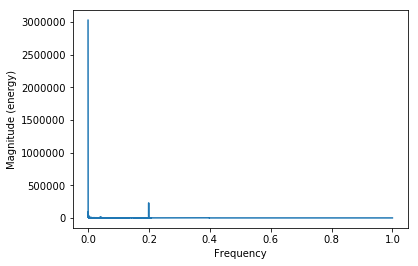

In [134]:

plt.magnitude_spectrum(rightf[:][0])
plt.show()

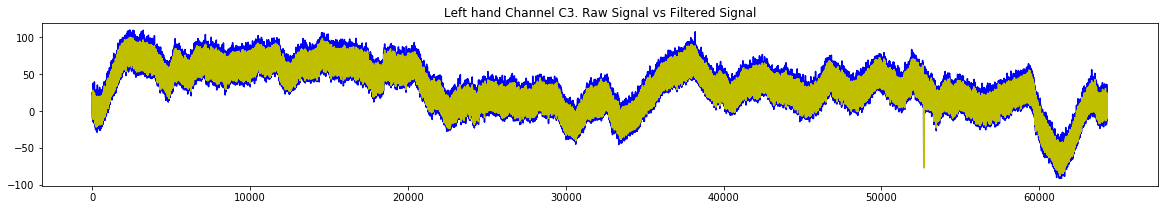

In [148]:
plt.figure(figsize=(20,3))
plt.title("Left hand Channel C3. Raw Signal vs Filtered Signal")
plt.plot(lc3c4[:][0],'b')
plt.plot(leftf[:][0],'y')

plt.savefig("filtered EEG left hand channel c3.png")
plt.show()


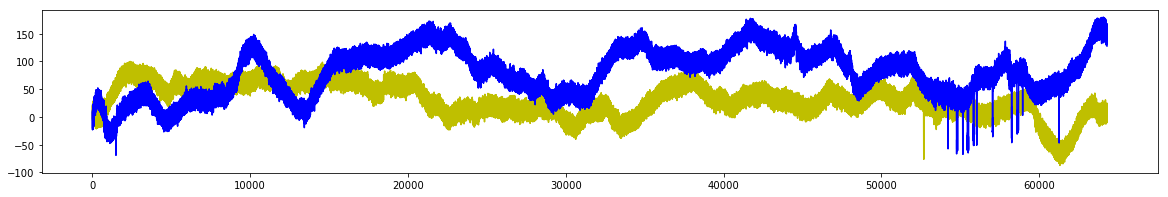

In [94]:
plt.figure(figsize=(20,3))
plt.plot(time,leftf[:][0],'y')
plt.plot(time,rightf[:][0],'b')
plt.show()

In [95]:
from scipy import signal
peakindlc3 = signal.find_peaks_cwt(leftf[:][0], np.arange(100,200))
peakindlc4 = signal.find_peaks_cwt(leftf[:][1], np.arange(100,200))
peakindrc3 = signal.find_peaks_cwt(rightf[:][0], np.arange(100,200))
peakindrc4 = signal.find_peaks_cwt(rightf[:][1], np.arange(100,200))

In [97]:

plt.plot(leftf[0][peakindlc3])

plt.plot(leftf[1][peakindlc4])


plt.plot(rightf[0][peakindrc3])

plt.plot(rightf[1][peakindrc4])

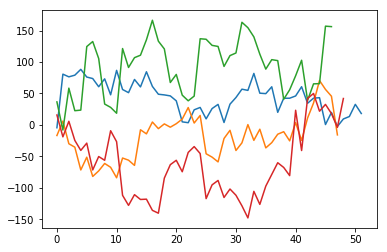

In [98]:
 plt.show()

In [99]:
#t=min([len(rightf[1][peakindrc4]),len(rightf[0][peakindrc4]),len(leftf[1][peakindrc4]),len(leftf[1][peakindrc4])])



TypeError: 'int' object is not callable

In [ ]:
#t

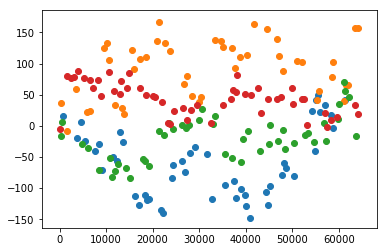

In [101]:
plt.scatter(peakindrc4,rightf[1][peakindrc4])
plt.scatter(peakindrc3,rightf[0][peakindrc3])
plt.scatter(peakindlc4,leftf[1][peakindlc4])
plt.scatter(peakindlc3,leftf[0][peakindlc3])
plt.show()

In [102]:
r=np.vstack((rightf[0][peakindrc3],rightf[1][peakindrc3]))
l=np.vstack((leftf[0][peakindlc3],leftf[1][peakindlc3]))

In [103]:
print(r.shape)


#l.shape
#rightf=r
#leftf=l

(2, 47)


In [104]:
len(peakindlc4)

48

In [105]:
import sys
from numpy import NaN, Inf, arange, isscalar, asarray, array
def peakdet(v, delta, x = None):
    """

    
    Returns two arrays
    
    function [maxtab, mintab]=peakdet(v, delta, x)
    %PEAKDET Detect peaks in a vector
    %        [MAXTAB, MINTAB] = PEAKDET(V, DELTA) finds the local
    %        maxima and minima ("peaks") in the vector V.
    %        MAXTAB and MINTAB consists of two columns. Column 1
    %        contains indices in V, and column 2 the found values.
    %      
    %        With [MAXTAB, MINTAB] = PEAKDET(V, DELTA, X) the indices
    %        in MAXTAB and MINTAB are replaced with the corresponding
    %        X-values.
    %
    %        A point is considered a maximum peak if it has the maximal
    %        value, and was preceded (to the left) by a value lower by
    %        DELTA.
    
 
    
    """
    maxtab = []
    mintab = []
       
    if x is None:
        x = arange(len(v))
    
    v = asarray(v)
    
    if len(v) != len(x):
        sys.exit('Input vectors v and x must have same length')
    
    if not isscalar(delta):
        sys.exit('Input argument delta must be a scalar')
    
    if delta <= 0:
        sys.exit('Input argument delta must be positive')
    
    mn, mx = Inf, -Inf
    mnpos, mxpos = NaN, NaN
    
    lookformax = True
    
    for i in arange(len(v)):
        this = v[i]
        if this > mx:
            mx = this
            mxpos = x[i]
        if this < mn:
            mn = this
            mnpos = x[i]
        
        if lookformax:
            if this < mx-delta:
                maxtab.append((mxpos, mx))
                mn = this
                mnpos = x[i]
                lookformax = False
        else:
            if this > mn+delta:
                mintab.append((mnpos, mn))
                mx = this
                mxpos = x[i]
                lookformax = True


    return array(maxtab), array(mintab)

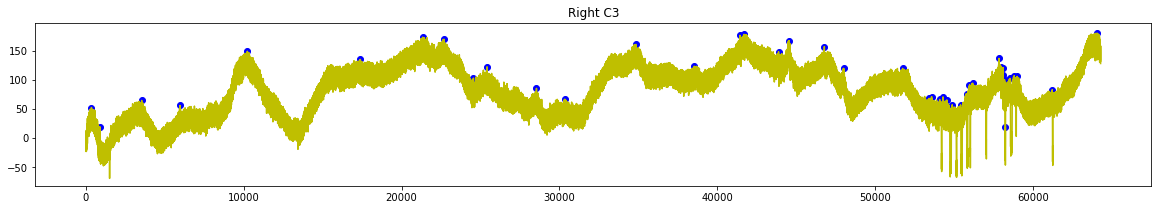

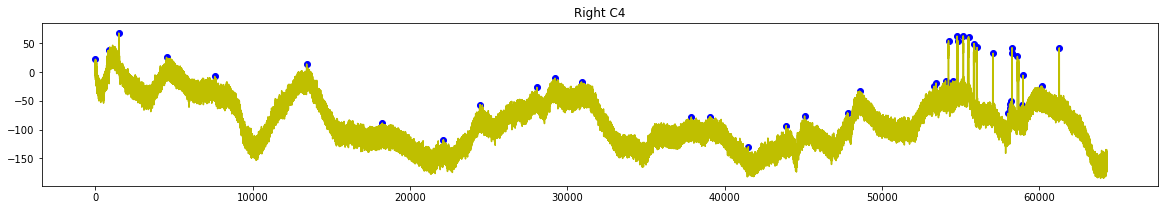

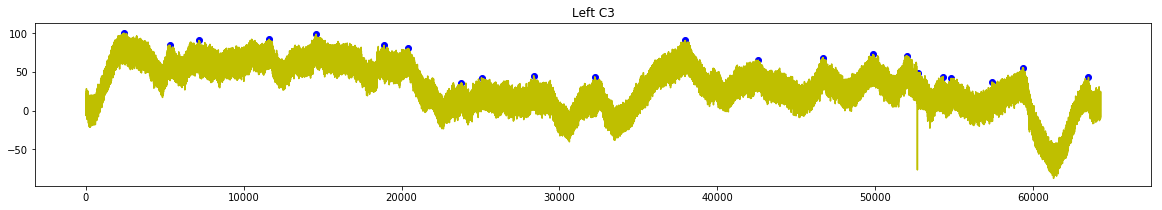

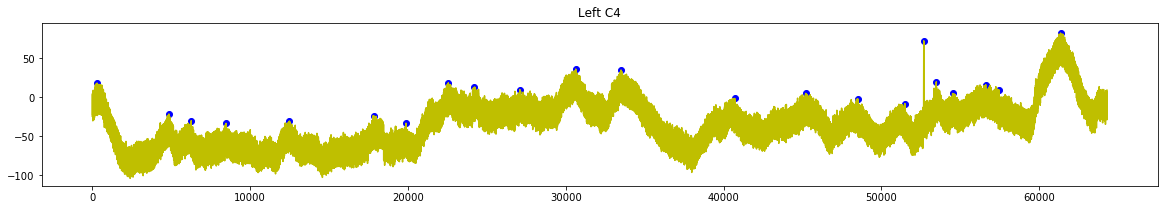

In [164]:
rc3=rightf[:][0]
rc4=rightf[:][1]
lc3=leftf[:][0]
lc4=leftf[:][1]

from matplotlib.pyplot import plot, scatter, show,title,savefig
series = rc3.tolist()
series2= rc4.tolist()
seriesl1=lc3.tolist()
seriesl2=lc4.tolist()
maxtabrc3, mintabrc3 = peakdet(series,50)
maxtabrc4,mintabrc4 = peakdet(series2,50)
maxtablc3,mintablc3=peakdet(seriesl1,50)
maxtablc4,mintablc4=peakdet(seriesl2,50)
plt.figure(figsize=(20,3))
plot(series,'y')
title('Right C3')
scatter(array(maxtabrc3)[:,0], array(maxtabrc3)[:,1], color='b')
#scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
savefig("Right C3 Peaks.png")
show()

plt.figure(figsize=(20,3))
plot(series2,'y')
title('Right C4')
scatter(array(maxtabrc4)[:,0], array(maxtabrc4)[:,1], color='b')

#scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
savefig("Right C4 Peaks.png")
show()

plt.figure(figsize=(20,3))
plot(seriesl1,'y')
title('Left C3')
scatter(array(maxtablc3)[:,0], array(maxtablc3)[:,1], color='b')
savefig("Left C3 Peaks.png")
#scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
show()

plt.figure(figsize=(20,3))
plot(seriesl2,'y')
title('Left C4')
scatter(array(maxtablc4)[:,0], array(maxtablc4)[:,1], color='b')
savefig("Left C4 Peaks.png")
#scatter(array(mintab)[:,0], array(mintab)[:,1], color='red')
show()

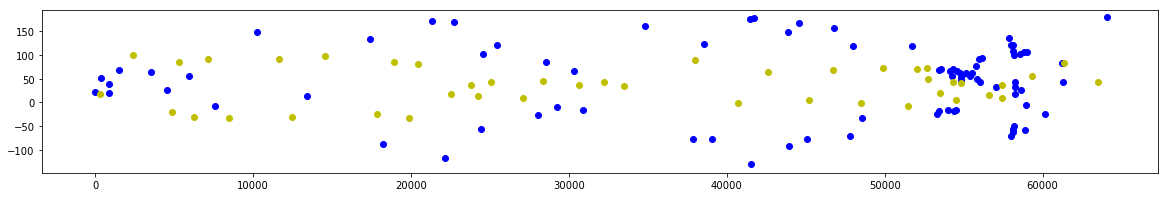

In [165]:
from matplotlib.pyplot import plot, scatter, show,title,savefig

plt.figure(figsize=(20,3))

scatter(array(maxtabrc3)[:,0], array(maxtabrc3)[:,1], color='b')

scatter(array(maxtabrc4)[:,0], array(maxtabrc4)[:,1], color='b')


scatter(array(maxtablc3)[:,0], array(maxtablc3)[:,1], color='y')



scatter(array(maxtablc4)[:,0], array(maxtablc4)[:,1], color='y')

show()

In [153]:

print("maxrc3",maxtabrc3.shape)
print("maxrc4",maxtabrc4.shape)
print("minrc3",mintabrc3.shape)
print("minrc4",mintabrc4.shape)
print("maxlc3",maxtablc3.shape)
print("maxlc4",maxtablc4.shape)
print("minlc3",mintablc3.shape)

print("minlc4",maxtabrc4.shape)

maxrc3 (43, 2)
maxrc4 (43, 2)
minrc3 (42, 2)
minrc4 (43, 2)
maxlc3 (22, 2)
maxlc4 (22, 2)
minlc3 (21, 2)
minlc4 (43, 2)


In [154]:
maxrc3=maxtabrc3[:,1]
maxrc4=maxtabrc4[:,1]
maxlc3=maxtablc3[:,1]
maxlc4=maxtablc4[:,1]
print('left3',maxlc3.shape)
print('left4',maxlc4.shape)
print("right3",maxrc3.shape)
print('right4',maxrc4.shape)

mini=174

left3 (22,)
left4 (22,)
right3 (43,)
right4 (43,)


In [156]:
mlc3=maxlc3[:mini]
mlc4=maxlc4[:mini]

mrc3=maxrc3[:mini]
mrc4=maxrc4[:mini]

(22,)

In [110]:
mR = {'C3': mrc3, 'C4': mrc4}
mL = {'C3': mlc3, 'C4': mlc4}

ml_data = pd.DataFrame(data=mL)
mr_data = pd.DataFrame(data=mR)

ml_data['label']=1 #IF Data is From LEft HAnd it is 1
mr_data['label']=0 #IF Data is from Right Hand it is 0

main_data=pd.concat([ml_data, mr_data])

mfeat=main_data[['C3','C4']]
mlabe=main_data[['label']]

In [111]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(mfeat, mlabe, test_size = 0.3, random_state=42, stratify=mlabe)

#Running The Model
model=RandomForestClassifier(n_estimators=200, random_state=42, max_depth=15)
model.fit(train_features,train_labels)
prediction=model.predict(test_features)
print(classification_report(test_labels, prediction))
print("RF Accuracy is :",accuracy_score(test_labels,prediction)*100)
rfa=accuracy_score(test_labels,prediction)*100

C:\Users\Vivek Sharma\AppData\Local\Programs\Python\Python36\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


             precision    recall  f1-score   support

          0       0.92      0.92      0.92        13
          1       0.86      0.86      0.86         7

avg / total       0.90      0.90      0.90        20

RF Accuracy is : 90.0


In [122]:
from sklearn.neighbors import KNeighborsClassifier

my_classifier=KNeighborsClassifier(n_neighbors=5)

my_classifier.fit(train_features,train_labels)
prediction=my_classifier.predict(test_features)
print(classification_report(test_labels, prediction))
print("K NN Accuracy is :",accuracy_score(test_labels,prediction)*100)
knna=accuracy_score(test_labels,prediction)*100

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        13
          1       1.00      0.86      0.92         7

avg / total       0.95      0.95      0.95        20

K NN Accuracy is : 95.0


C:\Users\Vivek Sharma\AppData\Local\Programs\Python\Python36\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


In [123]:
from sklearn.ensemble import GradientBoostingClassifier
my_classifier = GradientBoostingClassifier(n_estimators=50)
my_classifier.fit(train_features,train_labels)
prediction=my_classifier.predict(test_features)
print(classification_report(test_labels, prediction))
print("GBC is :",accuracy_score(test_labels,prediction)*100)
gbca=accuracy_score(test_labels,prediction)*100

             precision    recall  f1-score   support

          0       0.92      0.92      0.92        13
          1       0.86      0.86      0.86         7

avg / total       0.90      0.90      0.90        20

GBC is : 90.0


C:\Users\Vivek Sharma\AppData\Local\Programs\Python\Python36\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [124]:
clf = LinearDiscriminantAnalysis(n_components=5, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)
clf.fit(train_features, train_labels)
prediction=clf.predict(test_features)
print(classification_report(test_labels, prediction))
print("LDA is :",accuracy_score(test_labels,prediction)*100)
ldaa=accuracy_score(test_labels,prediction)*100

             precision    recall  f1-score   support

          0       0.71      0.92      0.80        13
          1       0.67      0.29      0.40         7

avg / total       0.69      0.70      0.66        20

LDA is : 70.0


C:\Users\Vivek Sharma\AppData\Local\Programs\Python\Python36\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [125]:

from sklearn import svm
clf=svm.SVC(kernel='linear')

clf.fit(train_features, train_labels)
prediction=clf.predict(test_features)
print(classification_report(test_labels, prediction))
print("svm is :",accuracy_score(test_labels,prediction)*100)
svma=accuracy_score(test_labels,prediction)*100


             precision    recall  f1-score   support

          0       0.69      0.85      0.76        13
          1       0.50      0.29      0.36         7

avg / total       0.62      0.65      0.62        20

svm is : 65.0


C:\Users\Vivek Sharma\AppData\Local\Programs\Python\Python36\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [126]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(train_features, train_labels)
prediction=clf.predict(test_features)
print(classification_report(test_labels, prediction))
print("dt is :",accuracy_score(test_labels,prediction)*100)
dta=accuracy_score(test_labels,prediction)*100

             precision    recall  f1-score   support

          0       0.92      0.92      0.92        13
          1       0.86      0.86      0.86         7

avg / total       0.90      0.90      0.90        20

dt is : 90.0


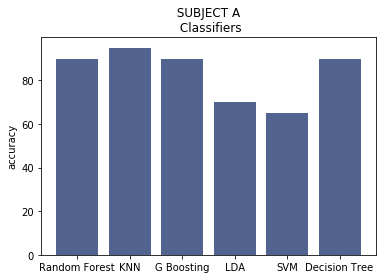

In [158]:
objects = ('Random Forest', 'KNN', 'G Boosting','LDA','SVM','Decision Tree')
y_pos = np.arange(len(objects))
performance = [rfa,knna,gbca,ldaa,svma,dta]
 
plt.bar(y_pos, performance, align='center', alpha=0.8,color='#273c75')
plt.xticks(y_pos, objects)
plt.ylabel('accuracy')
plt.title(' SUBJECT A \n Classifiers')
plt.savefig('Accuracy comparison.png')
plt.show()